# Clustering

### Exercício 1

Será utilizada uma base fictícia contendo dados de visitas de clientes em um site que é desejável segmentar:

- **Visitas**: quantidade de visitas realizadas durante o mês
- **Tempo**: tempo, em segundos, que os usuários ficaram no site

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)

In [12]:
df = pd.read_csv("case.csv")

In [13]:
# Observando o conjunto de dados

df.head()

,visitas,tempo
0,3,2
1,16,18
2,7,1
3,14,11
4,3,24


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   visitas  3000 non-null   int64
 1   tempo    3000 non-null   int64
dtypes: int64(2)
memory usage: 47.0 KB


In [15]:
df.describe()

,visitas,tempo
count,3000.000000,3000.000000
mean,30.221000,41.165333
std,24.852097,24.983863
min,0.000000,0.000000
25%,9.000000,19.000000
50%,19.000000,42.000000
75%,56.000000,62.000000
max,87.000000,104.000000


Como os agrupamentos são definidos com base em uma medida de distância, primeiro **é necessário normalizar os dados**!

In [16]:
# Importar o StandardScaler e normalizar os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

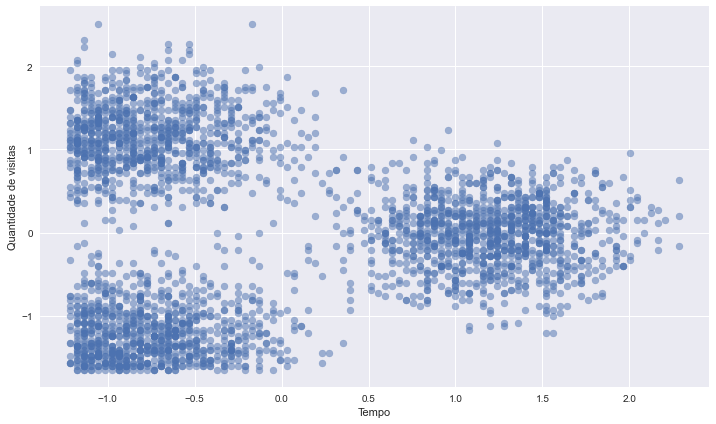

In [17]:
plt.scatter(df.visitas, df.tempo, alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

In [18]:
# Importando o K-means

from sklearn.cluster import KMeans

In [19]:
# Cria do uma instância do K-means
kmeans = KMeans() 
kmeans.fit(df)

# Salvando os centroides
centroides = kmeans.cluster_centers_

# Salvando as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

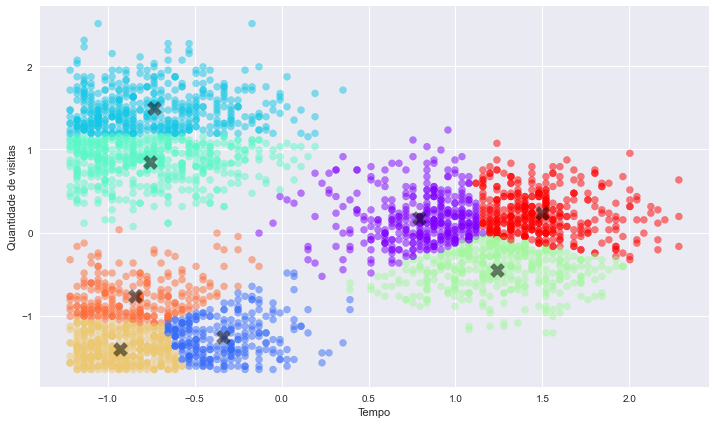

In [20]:
# Plotando os dados e identificando seus clusters
plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

In [21]:
# Rodando o K-means definindo o número de clusters como 50
kmeans = KMeans(n_clusters=50, random_state = 42) 
kmeans.fit(df)

# Salvando os centroides
centroides = kmeans.cluster_centers_

# Salvando as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

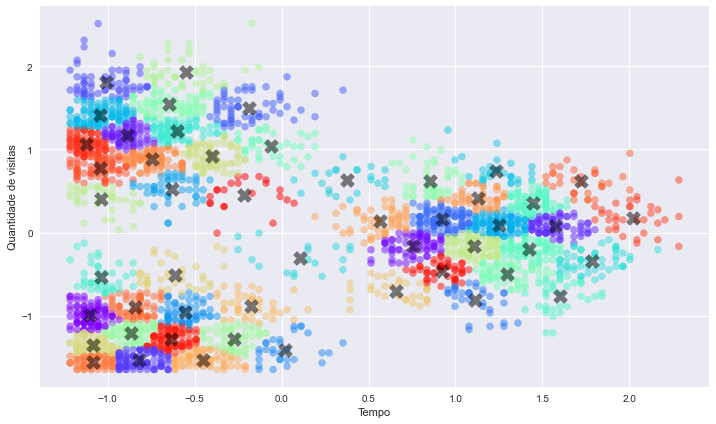

In [22]:
# Plotando para n_clusters = 50

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

Para este conjunto, visivelmente, há uma clara divisão entre 3 grupos. Será então testado para n_clusters = 3

In [23]:
# Rodando o K-means definindo o número de clusters como 3
kmeans = KMeans(n_clusters=3, random_state = 42) 
kmeans.fit(df)

# Salvando os centroides
centroides = kmeans.cluster_centers_

# Salvando as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

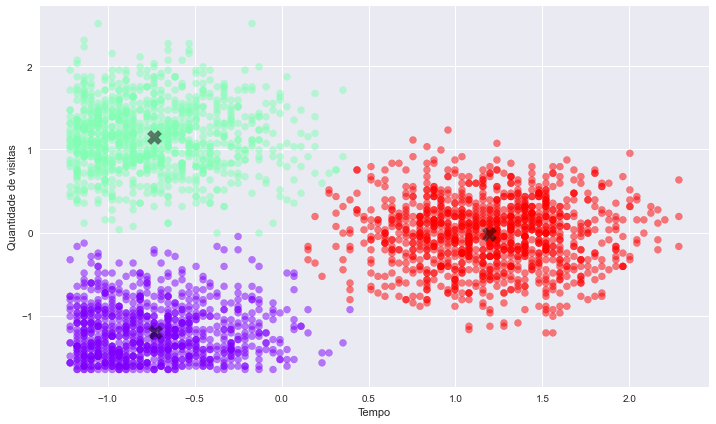

In [24]:
# Plotando para n_clusters = 3

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

Neste exemplo, é visível a separação do conjunto de dados, porém quando não é, se observa o gráfico do cotovelo.

Para escolher o número de clusters, observa-se o gráfico do cotovelo com as inércias e é escolhido o ponto no qual a inércia começa a ficar mais plana e formar um "cotovelo":

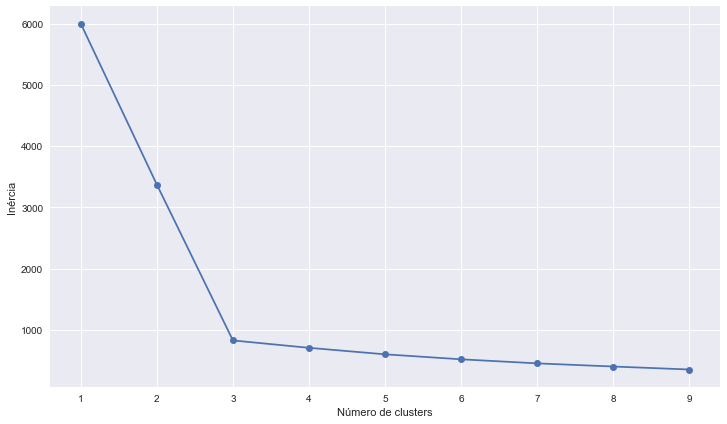

In [25]:
# Quantidade de clusters que serão testados
k = list(range(1, 10))

# Armazenando as inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=8)
    kmeans.fit(df)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

### Exercício 2

Neste caso, será feita mais uma segmentação de clientes com o K-Means, dessa vez com mais features.

Hipoteticamente, há um projeto de um e-commerce que tem como objetivo segmentar e entender seus clientes para realizar campanhas de marketing.

In [26]:
segmentation = pd.read_csv("customer_segmentation.csv")

In [27]:
segmentation.head()

,id,tem_cartao,idade,renda,score
0,1,Não,19,1500,39
1,2,Não,21,1500,81
2,3,Sim,20,1600,6
3,4,Sim,23,1600,77
4,5,Sim,31,1700,40


Esse conjunto de dados possui 5 campos:

- **id**: código identificador do cliente
- **tem_cartao**: indica se o cliente tem cartão de crédito do e-commerce ou não
- **idade**: idade do cliente
- **renda**: renda mensal do cliente, em reais
- **score**: score indicando o gasto do cliente. Quanto maior, mais o cliente gasta no e-commerce

### Pré-processando os dados antes de realizar o agrupamento

In [28]:
# Removendo o id

segmentation.drop(columns='id', inplace=True)

In [29]:
# Importando o LabelEncoder para lidar com a variável categórica "tem_cartao"

from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder = LabelEncoder()
segmentation['tem_cartao'] = label_encoder.fit_transform(segmentation.tem_cartao.values)

In [31]:
# Normalizando os dados

scaler = StandardScaler()
scaled_segmentation = pd.DataFrame(scaler.fit_transform(segmentation),columns = segmentation.columns)

Utilizando a regra do cotovelo para escolher o número de clusters:

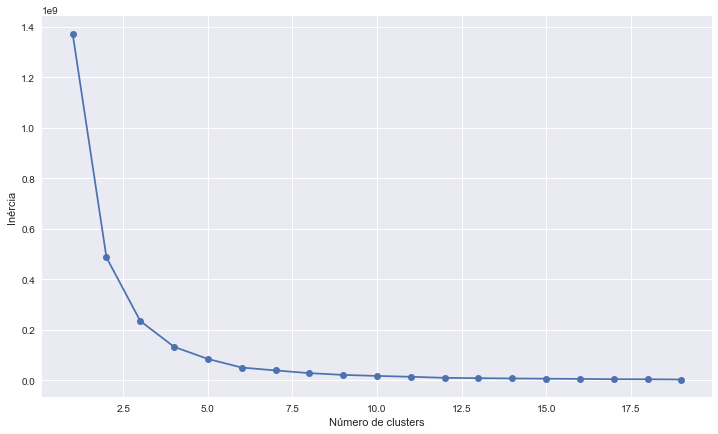

In [32]:
# Quantidade de clusters que serão testados
k = list(range(1, 20))

# Armazenando as inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Com base no gráfico acima, é possível escolher a quantidade de clusters que serão criados:

In [33]:
modelo = KMeans(n_clusters=4, random_state=42)
clusters = modelo.fit_predict(scaled_segmentation)

Após o agrupamento, é preciso reverter a normalização para que sejá possível interpretar os clusters formados

In [34]:
original_segmentation = pd.DataFrame(scaler.inverse_transform(scaled_segmentation),columns=segmentation.columns)

Como foram utilizadas 4 features para criação dos clusters, não é possível visualizá-las como no 1° exercício.

É possível utilizar o pairplot para tentar interpretar os clusters:

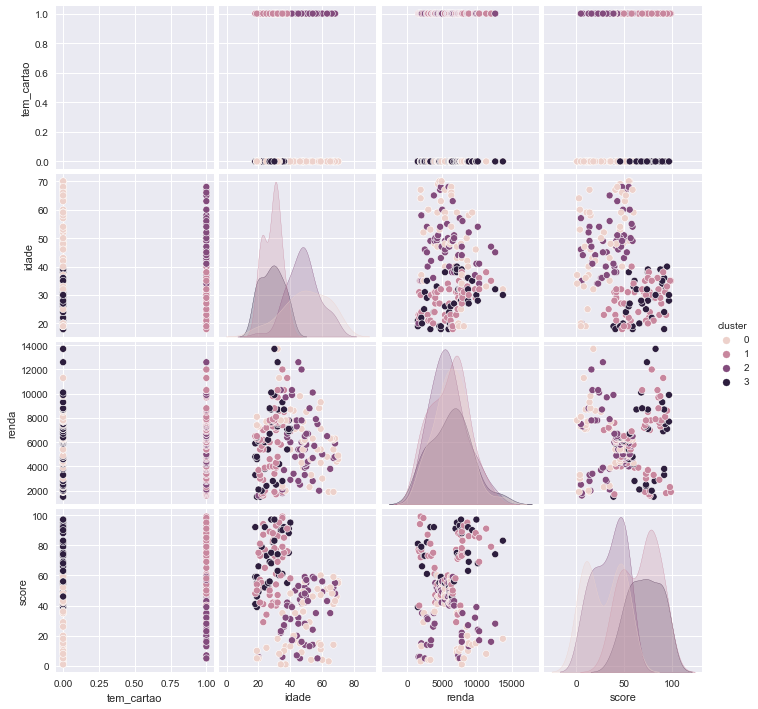

In [35]:
original_segmentation['cluster'] = clusters
sns.pairplot(original_segmentation, hue = 'cluster');

**O que é possível identificar com base nos clusters criados?**

- **Cluster 0** - esse cluster compreende os clientes mais velhos e menos engajados, visto que não apresentam o cartão de crédito e que apresentam score de gastos mais baixos.
- **Cluster 1** - esse cluster compreende os clientes adultos que possuem o cartão de crédito e um score relativamente alto, indicando que esse cluster contempla os clientes mais engajados.
- **Cluster 2** - esse cluster compreende clientes um pouco mais velhos que, apesar de possuírem o cartão, não gastam tanto no site. Pode ser interessante realizar campanhas com promoções e mostrando as vantagens da utilização com o cartão de crédito do e-commerce voltadas para esse público mais velho.
- **Cluster 3** - esse cluster é similar ao Cluster 1, com a diferença de que os clientes nesse cluster não possuem o cartão de crédito do e-commerce. Pode ser interessante realizar campanhas para engajar esses clientes a adquirirem o cartão.

Além disso, para esse agrupamento, a renda mensal não parece diferenciar muito bem os clusters, visto que todos apresentam uma distribuição relativamente similar. 

Talvez com uma quantidade maior de clusters, a renda poderia variar conforme o cluster que o cliente pertencesse! Só é preciso tomar cuidado porque quanto maior a quantidade de clusters, menor é a quantidade de exemplos que estarão em cada um deles:

In [36]:
original_segmentation.cluster.value_counts()

1    57
2    55
0    48
3    40
Name: cluster, dtype: int64

Além dessa análise dos clusters considerando a distribuição das features em cada um deles, **também seria possível utilizar os centroides para caracterizar cada cluster**, visto que eles são os representantes de cada grupo.

### Exemplo - Compressão de imagens

Observando um exemplo de aplicação do K-Means trabalhando com imagens

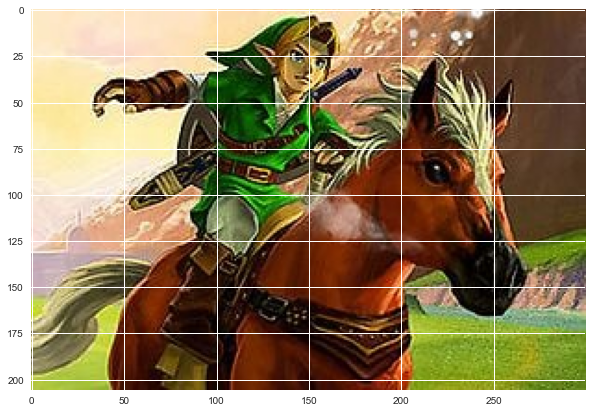

In [37]:
# Importando a imagem

img = plt.imread("link_tloz.jpg")
plt.imshow(img)
plt.show()

In [38]:
# Redimensionando a imagem para ter somente duas dimensões de dados
x, y, z = img.shape
img_2d = img.reshape(x*y, z)
img_2d.shape

(61800, 3)

In [47]:
# Escolhendo um número de clusters e usando o K-means para realizar os agrupamentos
kmeans_img = KMeans(n_clusters=8, random_state=42)
kmeans_img.fit(img_2d)

cluster_centers = kmeans_img.cluster_centers_
cluster_labels = kmeans_img.labels_

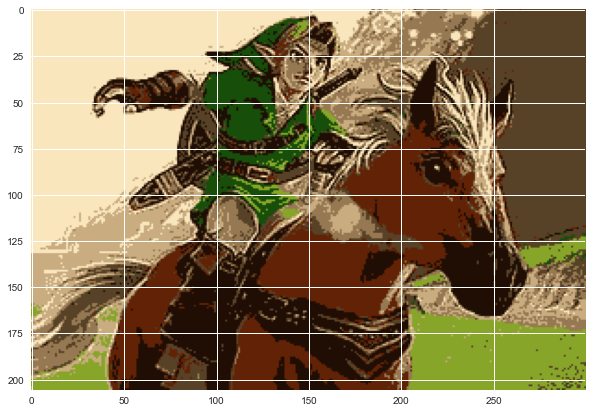

In [49]:
# Quanto mais clusters, mais colorida a imagem ficará

plt.imshow(cluster_centers[cluster_labels].
           reshape(x, y, z).astype(int))
plt.show()

### Exercício 3

Será utilizado o mesmo conjunto de dados utilizado no segundo exercício do K-means para realizar um agrupamento hierárquico aglomerativo. Para esse agrupamento, será preciso importar o dendograma do [Scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

In [50]:
# Importar os módulos dendogram e linkage

from scipy.cluster.hierarchy import dendrogram, linkage

In [51]:
# Usando o método linkage para fazer o agrupamento hierárquico

h_cluster = linkage(scaled_segmentation, method='complete', metric='euclidean')

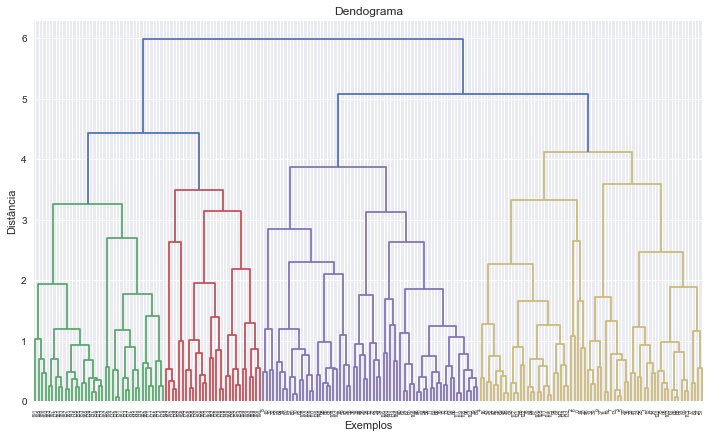

In [52]:
plt.title('Dendograma')
plt.xlabel('Exemplos')
plt.ylabel('Distância')
dendrogram(h_cluster)
plt.show()

### Exercício 4

Utilizando novamente o conjunto do primeiro exercício com o DBSCAN, que será importado do [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html):

In [53]:
# Importar o DBSCAN

from sklearn.cluster import DBSCAN

In [72]:
# Escolhendo um epsilon e um minPts

dbscan = DBSCAN(eps = 0.1, min_samples = 10)

# Salvando os clusters atribuídos para cada exemplo

clusters = dbscan.fit_predict(df)

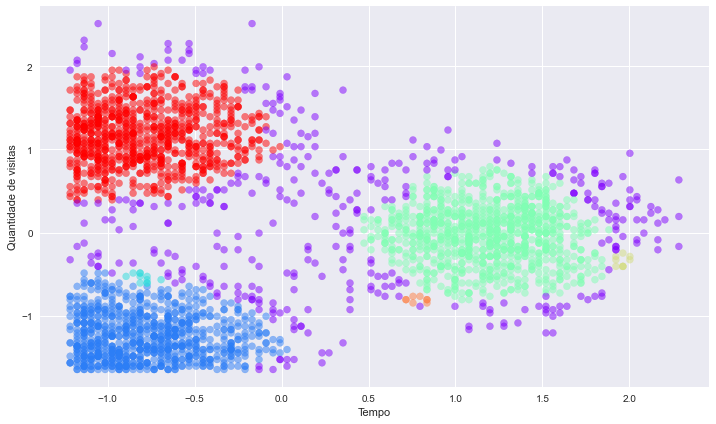

In [73]:
# Plota os clusters encontrados

plt.scatter(df.visitas, df.tempo, c=clusters, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

No gráfico acima, é possível notar que todos os exemplos em roxo foram considerados outliers pelo DBSCAN, ou seja, não foram colocados em nenhum cluster. Para esses casos, o DBSCAN retornará o valor -1 para indicar que o exemplo é um outlier.